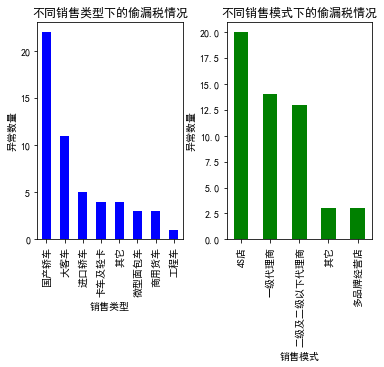

               count       mean        std     min      25%      50%  \
纳税人编号           53.0  73.867925  35.738924  4.0000  50.0000  78.0000   
汽车销售平均毛利        53.0   0.003698   0.153516 -1.0646   0.0000   0.0091   
维修毛利            53.0  -0.045575   0.532060 -3.1255   0.0000   0.0000   
企业维修收入占销售收入比重   53.0   0.043349   0.192004  0.0000   0.0000   0.0000   
增值税税负           53.0   0.008062   0.015379  0.0000   0.0000   0.0028   
存货周转率           53.0  11.915060  18.124865  0.0000   0.0000   4.7093   
成本费用利润率         53.0   0.171679   1.406692 -1.0000  -0.0428   0.0000   
整体理论税负          53.0   0.008613   0.048427 -0.1810   0.0000   0.0037   
整体税负控制数         53.0   0.001043   0.003816 -0.0070   0.0000   0.0000   
办牌率             53.0   0.136085   0.247557  0.0000   0.0000   0.0000   
单台办牌手续费收入       53.0   0.016613   0.038970  0.0000   0.0000   0.0000   
代办保险率           53.0   0.075189   0.175527  0.0000   0.0000   0.0000   
保费返还率           53.0   0.018917   0.046666  0.0000   0.0000   0.

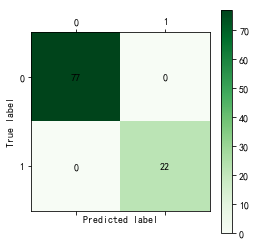

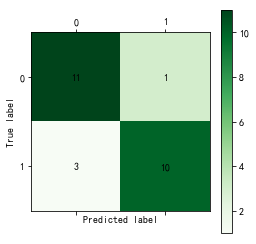

********************************决策树模型*********************************


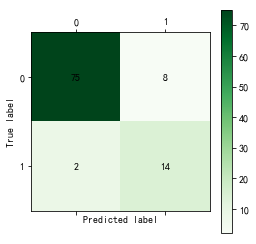

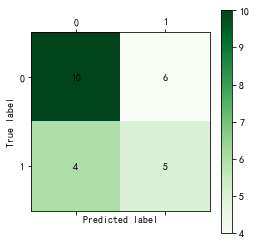

********************************决策树模型*********************************


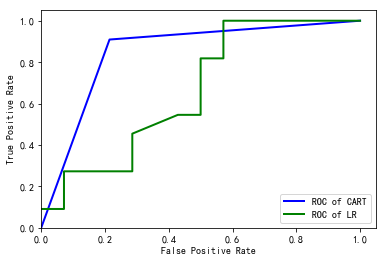

In [1]:
# -*- coding: utf-8 -*-
"""
创建时间 Wed Sep 19 10:11:49 2018
描述:
作者:PM.liugang
"""
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def cmPlot(yTrue, yPred):
    '''
    param yTrue
    param yPred
    return
    '''
    cm = confusion_matrix(yTrue, yPred)  # 生成混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图，配色风格使用cm.Greens
    plt.colorbar()  # 颜色标签
    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y],
                         xy=(x, y),
                         horizontalalignment='center',
                         verticalalignment='center')
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    return plt

plt.rcParams['font.sans-serif'] = ['SimHei']

df = pd.read_excel('data.xls')

fig = plt.figure()
fig.set(alpha=0.2)
plt.subplot2grid((1,2),(0,0))
xs_type = df['销售类型'][df['输出']=='异常'].value_counts()
xs_model = df['销售模式'][df['输出']=='异常'].value_counts()

xs_type.plot(kind='bar',color='blue')
plt.title('不同销售类型下的偷漏税情况')
plt.xlabel('销售类型')
plt.ylabel('异常数量')
plt.subplot2grid((1,2),(0,1))

xs_model.plot(kind='bar',color='green')
plt.title('不同销售模式下的偷漏税情况')
plt.xlabel('销售模式')
plt.ylabel('异常数量')
plt.subplots_adjust(wspace=0.3)
plt.show()

print(df[df['输出']=='异常'].describe().T) # 没有缺失值
print(df[df['输出']=='正常'].describe().T) # 没有缺失值

type_dummies = pd.get_dummies(df['销售类型'],prefix='type')
model_dummies = pd.get_dummies(df['销售模式'],prefix='model')
result_dummies = pd.get_dummies(df['输出'],prefix='result')
df = pd.concat([df,type_dummies,model_dummies,result_dummies],axis=1)
df.drop(['销售类型','销售模式','输出'],axis=1,inplace=True)
df.drop(['result_正常'],axis=1,inplace=True)
df.rename(columns={'result_异常':'result'},inplace=True)

data = df.values
from random import shuffle
shuffle(data)
dataTrain = data[:int(len(data)*0.8),:]
dataTest = data[int(len(data)*0.8):,:]
y = dataTrain[:,-1]
x = dataTrain[:,1:-1]

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x,y)

cmPlot(y,tree.predict(x)).show()
cmPlot(dataTest[:,-1],tree.predict(dataTest[:,1:-1])).show()
print('决策树模型'.center(70,'*'))
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
clf.fit(x,y)
pd.DataFrame({'columns':list(df.columns)[1:-1],'coef':list(clf.coef_.T)})
cmPlot(y,clf.predict(x)).show()
predictions=clf.predict(dataTest[:,1:-1])
cmPlot(dataTest[:,-1],predictions).show()
print('决策树模型'.center(70,'*'))

from sklearn.metrics import roc_curve
fig,ax=plt.subplots()
fpr, tpr, thresholds = roc_curve(dataTest[:,-1], 
                                 tree.predict_proba(dataTest[:,1:-1])[:,1], 
                                 pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(dataTest[:,-1], 
                                    clf.predict_proba(dataTest[:,1:-1])[:,1], 
                                    pos_label=1)
plt.plot(fpr, 
         tpr, 
         linewidth=2, 
         label = 'ROC of CART', 
         color = 'blue') #作出ROC曲线
plt.plot(fpr2, 
         tpr2, 
         linewidth=2, 
         label = 'ROC of LR', 
         color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果
